In [ ]:
#Mount Drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
file_name = "/path/.zip"

with ZipFile(file_name,'r') as zip:
   zip.extractall("/Videos")
   print('Done')

Done


In [ ]:
import numpy as np
 
#fight1= open(, "r")
# Read the array from disk
text_data = np.loadtxt("/path/.txt")

# Note that this returned a 2D array!
print (text_data.shape)

# However, going back to 3D is easy if we know the 
# original shape of the array
data_3D = text_data.reshape((2332,30,1000))
#print (data_3D.shape)
    
# Just to check that they're the same...
#print(data_3D)

In [ ]:
import numpy as np
 
#fight1= open(, "r")
# Read the array from disk
label_fight_data = np.loadtxt("FightLabel.txt" , dtype=np.str)
label_normal_data = np.loadtxt("NormalLabel.txt", dtype=np.str)

dataset_label = np.vstack((label_fight_data, label_normal_data))

print(dataset_label.shape)
np.savetxt("Label.txt",dataset_label, fmt='%s')

# Note that this returned a 2D array!
print (dataset_label)


(2019, 2)
[['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ...
 ['/content/drive/MyDrive/Videos/Normal_Videos_for_Event_Recognition/Normal_Videos_914_x264.mp4'
  '0']
 ['/content/drive/MyDrive/Videos/Normal_Videos_for_Event_Recognition/Normal_Videos_914_x264.mp4'
  '0']
 ['/content/drive/MyDrive/Videos/Normal_Videos_for_Event_Recognition/Normal_Videos_914_x264.mp4'
  '0']]


In [ ]:
print(dataset_3D_array)

In [ ]:
print(dataset_3D_array.shape)

(2332, 30, 1000)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax, MaxPool2D, Conv2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout # one of the best regularizers\n",
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
import numpy as np
 
#fight1= open(, "r")
# Read the array from disk
dataset_label_array = np.loadtxt("Label.txt", dtype='str')

# Note that this returned a 2D array!
print (dataset_label_array.shape)


(2332, 2)


In [ ]:
print(dataset_label_array)

[['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ['/content/drive/MyDrive/Videos/Fighting1/Fighting/Fighting002_x264.mp4'
  '1']
 ...
 ['/content/drive/MyDrive/Videos/VADSCrafted/VADSCrafted/83.mkv' '1']
 ['/content/drive/MyDrive/Videos/VADSCrafted/VADSCrafted/9.mkv' '1']
 ['/content/drive/MyDrive/Videos/VADSCrafted/VADSCrafted/9.mkv' '1']]


In [ ]:
dataset_label = []
with open('Label.txt') as inf:
    for line in inf:
        parts = line.split() # split line into parts
        if len(parts) > 1:   # if at least 2 parts/columns
            dataset_label.append(int(parts[1]))
            print (parts[1])   

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [ ]:
print(dataset_label)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
print(len(dataset_label))

2332


In [ ]:
X, y = dataset_3D_array, dataset_label

In [ ]:
print(X)


[[[1.58128649e-04 2.49387766e-03 5.78248932e-04 ... 7.86210803e-05
   6.20644249e-04 1.22237403e-03]
  [4.27502528e-05 6.48634799e-04 3.37662699e-04 ... 1.63476288e-05
   4.72197135e-04 1.13474275e-03]
  [6.29386050e-05 1.24223740e-03 3.24713590e-04 ... 3.60704653e-05
   4.46959835e-04 1.14631373e-03]
  ...
  [2.74007252e-05 3.32278287e-04 1.78818547e-04 ... 1.15893363e-05
   4.84371179e-04 1.31085771e-03]
  [1.97687732e-05 2.83113302e-04 1.68728511e-04 ... 8.99477800e-06
   5.29356010e-04 6.83437567e-04]
  [1.89245766e-05 3.09198454e-04 1.46632170e-04 ... 8.51023742e-06
   4.63244010e-04 8.01799761e-04]]

 [[3.48906979e-05 5.23617549e-04 2.05143326e-04 ... 1.61012704e-05
   5.31571277e-04 1.54669292e-03]
  [1.70258645e-05 1.75095745e-04 1.65629157e-04 ... 8.96227630e-06
   4.67809587e-04 1.23883283e-03]
  [1.36641484e-05 9.39676829e-05 1.35425071e-04 ... 6.80705853e-06
   3.35275865e-04 1.12221180e-03]
  ...
  [1.82010717e-05 1.11798116e-04 1.22407277e-04 ... 2.83665986e-06
   1.90554

In [ ]:
print(y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.80, random_state=42)

In [ ]:
print(X_train.shape)

(1585, 30, 1000)


In [ ]:
print(X_validation.shape)

(397, 30, 1000)


In [ ]:
print(X_train)

[[[1.50602282e-04 2.01422255e-03 4.32520377e-04 ... 1.01832455e-04
   8.01121700e-04 1.30978622e-03]
  [8.39653413e-09 2.43334632e-08 7.58659553e-08 ... 4.73334011e-11
   2.78810899e-06 1.22654910e-07]
  [1.35359631e-04 2.53661047e-03 5.56092302e-04 ... 1.14702954e-04
   7.60696072e-04 1.41483254e-03]
  ...
  [2.91685092e-06 1.11591680e-05 2.21080954e-05 ... 7.83134283e-07
   1.42291072e-04 1.05708772e-04]
  [1.50748499e-04 2.10309075e-03 4.87501413e-04 ... 1.04435821e-04
   7.81261886e-04 1.32812990e-03]
  [3.30828448e-06 3.49235088e-05 2.89549262e-05 ... 2.35126458e-06
   3.01074557e-04 3.83398990e-04]]

 [[9.25705899e-05 1.03950163e-03 3.79434932e-04 ... 5.33154889e-06
   1.24800747e-04 3.12461727e-03]
  [3.84857121e-05 1.98462818e-04 1.64368728e-04 ... 3.48762956e-06
   1.66251717e-04 7.09622400e-04]
  [2.26359189e-04 1.99772255e-03 5.80724620e-04 ... 1.87174974e-05
   1.55755071e-04 1.80115877e-03]
  ...
  [5.91445860e-05 4.03911545e-04 2.17364985e-04 ... 1.73296903e-05
   2.57613

In [ ]:
print(X_train.shape)

(1585, 30, 1000)


In [ ]:
print(y_train)

[1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
y_train = np.array(y_train)
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)

In [ ]:
print(X_test.shape)
print(y_test.shape)
print(y_train.shape)
print(X_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(350, 30, 1000)
(350,)
(1585,)
(1585, 30, 1000)
(397, 30, 1000)
(397,)


In [ ]:
print(y_test)

[1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1
 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1
 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1
 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1]


In [ ]:
print(X_test)

In [ ]:
print(X_train.shape)

(1585, 30, 1000)


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [ ]:
# model 1
# lstm(128) -         dense(64)- dense(32)


# model 2
#  lstm(128, return_sequence = true) - lstm(64) -        dense(32) 
  

# model 3
# lstm(128) -         dense(100)   dense(50)


# Adam learning rate = 1e-3, 1e-4

# compile-----------------------
# epoch = 50 - 100 - 150
# batch_size = 10 - 16

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1:]), activation= "tanh", return_sequences= True, recurrent_activation="sigmoid",recurrent_dropout=0.0,unroll=False,use_bias=True))
model.add(Dropout(0.2))

model.add(LSTM(64, input_shape=(X_train.shape[1:]),  activation= "tanh", recurrent_activation="sigmoid",recurrent_dropout=0.0,unroll=False,use_bias=True))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    loss='SparseCategoricalCrossentropy',
    optimizer=opt,
    metrics=['accuracy',precision_m, recall_m],
)

history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data = (X_validation, y_validation))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 30, 128)           578048    
_________________________________________________________________
dropout_36 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_38 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 2)               

[Text(0.5, 0, 'Epochs')]

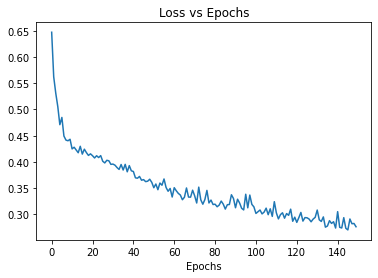

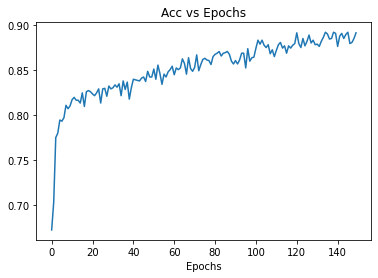

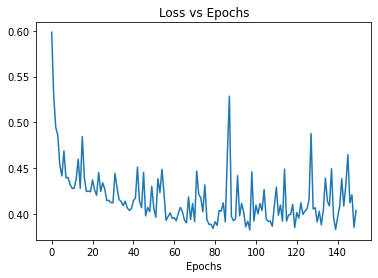

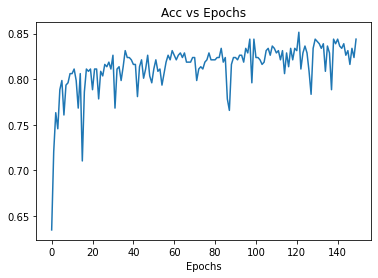

In [ ]:
import pandas as pd
df = pd.DataFrame(history.history)
df.head()
loss_plot = df.plot(y = 'loss' , title = 'Loss vs Epochs', legend= False)
loss_plot.set(xlabel='Epochs')
        
acc_plot = df.plot(y = 'accuracy' , title = 'Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')
        
loss_plot = df.plot(y = 'val_loss' , title = 'Loss vs Epochs', legend= False)
loss_plot.set(xlabel='Epochs')
acc_plot = df.plot(y = 'val_accuracy' , title = 'Acc vs Epochs', legend= False)
acc_plot.set(xlabel='Epochs')

In [ ]:
# test the model



# evaluate the model
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=2)

11/11 - 0s - loss: 0.4238 - accuracy: 0.8457 - precision_m: 0.6225 - recall_m: 1.0000


[[200  18]
 [ 36  96]]


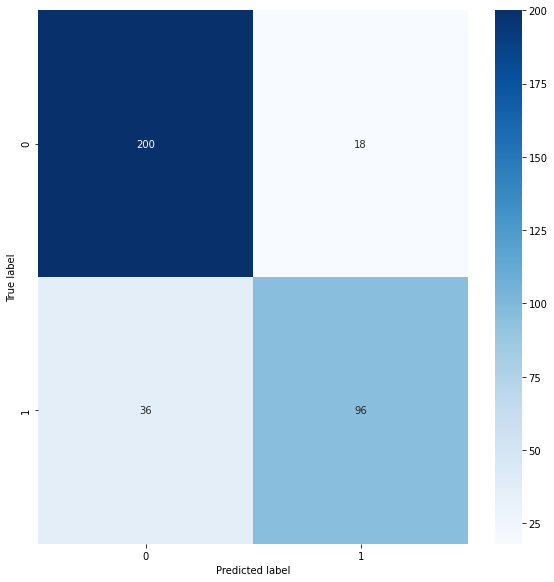

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
labels = [1, 0]
test_pred_raw = model.predict(X_test)

test_pred = np.argmax(test_pred_raw, axis=1)

# Calculate the confusion matrix using sklearn.metrics

cm = confusion_matrix(y_test, test_pred, labels)
con_mat_df = pd.DataFrame(cm)
print(cm)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues, fmt = 'd')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()